# Clase 27

Para una mejor visualización entrar al siguiente [link](https://nbviewer.jupyter.org/github/racsosabe/Miscelanea/blob/master/UPC/Clase%2027%20-%20Estructuras%20de%20Datos%20III.ipynb)

# Requisitos Previos

* Matemática Básica
* Matemática Discreta

# Segment Tree

Al momento de utilizar datos estáticos, uno suele realizar operaciones basadas en ellos con alta flexibilidad debido a que estos no varían, dando respuestas fijas a consultas fijas realizadas sobre los mismos.

Sin embargo, en el mundo real, los datos suelen variar con el tiempo en su mayoría, por lo que necesitamos alguna forma de poder manipularlos eficientemente con sus modificaciones y nuevas respuestas a las consultas hechas.

Una estructura de datos muy flexible respecto a las operaciones que se pueden realizar sobre los datos es el **Segment Tree**, que permite actualizar y consultar en un tiempo suficientemente rápido en la mayoría de casos.

El Segment Tree puede ser analizado tomando una función $f$ asociativa y una secuencia de elementos $a$ (de manera similar que con el BIT) y su punto de partida es similar al del algoritmo de Merge Sort: Divide & Conquer.

## Construcción

Supongamos que tenemos $n$ elementos $a_{i}$, con $i=1,\ldots,n$; entonces nuestra idea será usar un árbol binario, de forma que en cada nodo mantendremos información de un rango continuo de posiciones de nuestros elementos. Además de que un nodo $(l,r)$ guarde la información en el rango $[l,r]$, este tendrá 2 hijos **si y solo si** $l \neq r$, los cuales serán:

$$ \begin{array}{cc} \text{Hijo Izquierdo}: &\left(l,\left\lfloor\frac{l+r}{2}\right\rfloor\right) \\ \text{Hijo Derecho}: &\left(\left\lfloor\frac{l+r}{2}\right\rfloor+1,r\right) \end{array} $$

Ahora, esta idea funciona correctamente para elementos estáticos; sin embargo, para que nuestro enfoque tenga sentido, necesitamos el **Conquer**, así que una condición que tendremos será que **La información a almacenar de un nodo depende de la información guardada en sus hijos (si es que tiene) o es un dato puntual**.

La anterior condición se reformula en dos partes:

1) La información de (l,r), con $l \neq r$ depende de la información de sus hijos definidos anteriormente.

2) La información de (l,r) con $l = r$ es un dato puntual (lo cual tiene sentido puesto que es un solo elemento del rango de datos).

Debido a la condición 1, notamos que $Info(p) = f(Info(l),Info(r))$ para un nodo $p$ con hijos $l$ y $r$ (izquierdo y derecho respectivamente), lo cual implica que:

$$ Info(l,r) = f\left(Info\left(l,\left\lfloor\frac{l+r}{2}\right\rfloor\right),Info\left(\left\lfloor\frac{l+r}{2}\right\rfloor+1,r\right)\right) $$

Ahora la plantilla de implementación también estará basada en el Merge Sort, tomando una función `build` que construya los nodos de menor tamaño para luego combinarlos con otra función `merge` y obtener la respuesta de los nodos de mayor tamaño.

```Python
build(pos,l,r):
    if l == r:
        st[pos] = getInfo(a[l])
        return
    mi = (l+r)/2
    build(L[pos],l,mi)
    build(R[pos],mi+1,r)
    st[pos] = merge(st[L[pos]],st[R[pos]])
```

Donde `st[pos]` es una estructura adecuada para mantener la información, así como la función `getInfo` es autoexplicativa. Por último, notemos que usamos notación como en un arbol binario almacenado en un arreglo, por lo que el hijo izquierdo y el derecho de cada nodo estarán en un arreglo extra cada uno, llamados `L` y `R` respectivamente.

Finalmente, como el arbol tiene $n$ hojas (debido a que los únicos que no tienen hijos, por definición, son los rangos de tamaño 1), entonces la **cantidad de nodos** en total será menor que $2n$, por lo tanto la construcción será de $O(n)$. Asimismo, el árbol tendrá una altura $O(\log{n})$.

**Nota:** Por ahora, $f$ no tiene ninguna característica obligatoria.

**Nota 2:** Nótese que la cantidad de nodos puede ser menor que $2n$ pero algunas implementaciones pueden tomar $4n$ de memoria para los nodos.

## Comparación implementación $2i, 2i+1$ VS implementación $L[pos], R[pos]$

### Implementación $L[pos], R[pos]$

Notamos que la forma de construcción del Segment Tree usando los arreglos $L, R$ no usa nodos extra y siempre crea un nodo por cada respuesta parcial usada, así que se cumple la recursión:

$$ exact\_nodes_{0} = 0, exact\_nodes_{1} = 1 $$
$$ exact\_nodes_{n} = 1 + exact\_nodes_{\left\lfloor \frac{n}{2}\right\rfloor} + exact\_nodes_{n - \left\lfloor \frac{n}{2}\right\rfloor} $$

Entonces hagamos la gráfica para los $n \in [0, 10^{6}]$ respecto a la cantidad exacta de nodos, la función $4n$ y la función $2n$.

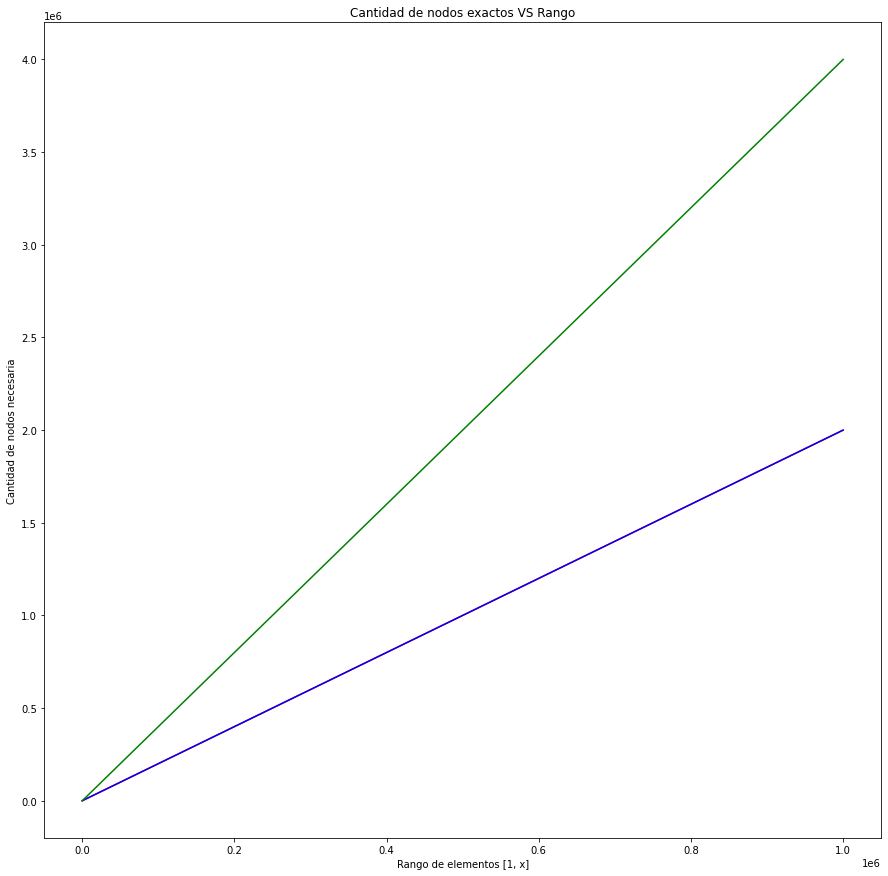

In [17]:
import matplotlib.pyplot as plt

exact_nodes = [0, 1]
implementation_nodes = [0, 1]
for i in range(2, 1000001):
    L = i // 2
    R = i - L
    exact_nodes.append(1 + exact_nodes[L] + exact_nodes[R])
    implementation_nodes.append(max(2 * implementation_nodes[L], 2 * implementation_nodes[R] + 1))

plt.figure(figsize=(15, 15))    
plt.plot(exact_nodes, 'r-')
plt.plot([2 * i for i in range(1000001)], 'b-')
plt.plot([4 * i for i in range(1000001)], 'g-')
plt.title('Cantidad de nodos exactos VS Rango')
plt.ylabel('Cantidad de nodos necesaria')
plt.xlabel('Rango de elementos [1, x]')
plt.show()

### Implementación $2i, 2i+1$

Notamos que la forma de construcción del Segment Tree usando los índices $2i, 2i+1$ necesita una cantidad de nodos igual al máximo índice de alguno de los nodos del mismo, así que podemos plantear la siguiente recursión:

$$ implementation\_nodes_{0} = 0, implementation\_nodes_{1} = 1 $$
$$ implementation\_nodes_{n} = \max{\left\{2\cdot implementation\_nodes_{\left\lfloor \frac{n}{2}\right\rfloor}, 2\cdot implementation\_nodes_{n - \left\lfloor \frac{n}{2}\right\rfloor} + 1\right\}} $$

Donde el primer término se multiplica por 2 por ser el máximo nodo del subárbol del hijo izquierdo y análogamente el del hijo derecho se multiplica por 2 y se le aumenta 1.

Entonces hagamos la gráfica para los $n \in [0, 10^{6}]$ respecto a la cantidad de nodos para la implementación propuesta, la función $4n$ y la función $2n$.

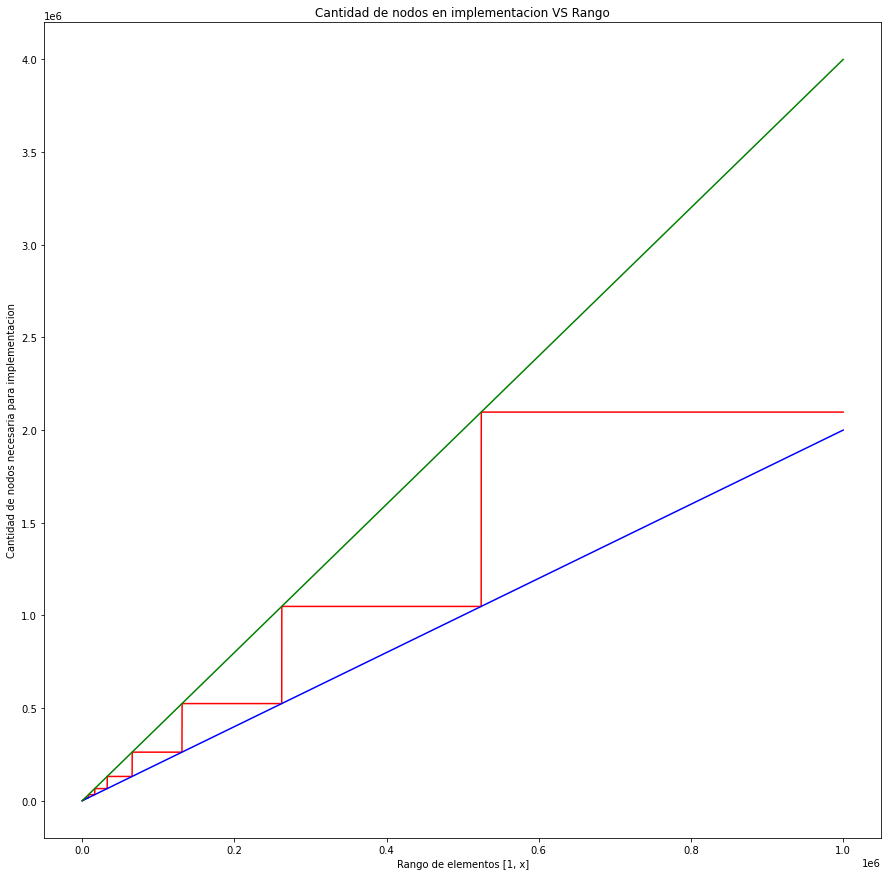

In [10]:
plt.figure(figsize=(15, 15))    
plt.plot(implementation_nodes, 'r-')
plt.plot([2 * i for i in range(1000001)], 'b-')
plt.plot([4 * i for i in range(1000001)], 'g-')
plt.title('Cantidad de nodos en implementacion VS Rango')
plt.ylabel('Cantidad de nodos necesaria para implementacion')
plt.xlabel('Rango de elementos [1, x]')
plt.show()

## Consultas

Ahora, para poder responder consultas como si fueran datos estáticos, necesitamos una manera de relacionar la información que tenemos en el árbol para satisfacerlas de manera eficiente. Para lo anterior, nos encontramos con dos posibles situaciones:

1) El rango es exactamente el usado en algún nodo del árbol: La respuesta se dará de manera inmediata una vez visitado el nodo correspondiente.

2) El rango es una mezcla de nodos no relacionados de manera directa (uno no es padre alguno otro): Necesitaremos plantear una condición sobre $f$ para que nuestro árbol no haya sido calculado en vano, la cual es que **$f$ sea asociativa**.

Nuestra función de consulta considerará lo siguiente al analizar el nodo $pos$ que cubre el rango $(l,r)$:

1) Si es que $[l,r]$ está dentro del rango que se desea consultar, entonces devolvemos Info(pos).

2) Si es que $[l,r]$ no se intersecta con el rango que se desea consultar, entonces devolvemos el elemento neutro de $f$.

3) Si no se da 1 ni 2, entonces realizamos las consultas sobre los hijos de $pos$ y las mezclamos para dar la respuesta del rango actual. Esta acción da la información correcta debido a 2, pues los elementos que debemos ignorar se manifestarán como el elemento neutro de $f$ y no afectarán a la respuesta.

Nuestra plantilla de consulta será una ligera variación usando los 3 casos anteriores:

```Python
query(x,y,pos,l,r):
    if y < l or r < x: return NIL # Elemento neutro porque no se intersectan
    if x <= l and r <= y: return st[pos] # Incluido por completo en el rango
    mi = (l+r)/2
    L = query(x,y,L[pos],l,mi) # Hijo izquierdo
    R = query(x,y,R[pos],mi+1,r) # Hijo derecho
    return merge(L,R) # Devolvemos la mezcla de las informaciones
```

**Teorema:** La anterior forma de consulta visita a lo mucho $4h$ nodos, donde $h$ es la altura del árbol.

**Prueba:**

Podemos probar por inducción que se visitan a lo mucho 4 nodos por nivel.

1) Tanto en el nivel 0 como en el 1 hay menos de 4 nodos, así que estos niveles cumplen trivialmente.

2) Asumimos que en un nivel $i \geq 2$ cumple con el teorema.

3) Tendremos algunos casos que analizar, pero principalmente podemos notar que cuando en el nivel $i$ se visitan 2 o menos nodos, entonces en el nivel $(i + 1)$ se visitarán 4 o menos, así que nos vamos a enfocar en los casos en que se visitan 3 o 4 nodos.

Debemos notar que estos 3 o 4 nodos representan un rango continuo y cada uno de ellos tiene una intersección no vacía con el intervalo de consulta $[x, y]$. Entonces, podemos considerar el nodo que tenga menor límite inferior, y en tal caso se debe cumplir que:
    
$$ x \leq r_{1} $$
    
Ahora, si consideramos el de mayor límite superior, se debe cumplir que:
    
$$ l_{k} \leq y $$
    
Debido a lo anterior, notamos que los intervalos que tengan índices en el rango $[2, k-1]$ están completamente incluidos en $[x, y]$, así que sus respuestas parciales serán usadas automáticamente sin realizar recursión.
    
Finalmente, concluimos que solamente los intervalos extremos (2 a lo mucho) pueden realizar la recursión y por ende en el nivel $(i + 1)$ se visitarán 4 nodos o menos.

Gracias a la conclusión anterior, se visitarán a lo mucho $4h$ nodos en total.

Ya que $h = O(\log{n})$, la consulta tiene complejidad $O(\log{n})$.

## Actualizaciones Puntuales

Para modificar **un solo elemento** de los datos, notamos que solamente la hoja con el rango $(l,l)$ tendrá su información, y si queremos modificar ese nodo, entonces existe un solo camino desde la raíz hasta este. Además de lo anterior, solamente los nodos que sean visitados por ese camino serán modificados como consecuencia, por lo que la actualización modificará $O(\log{n})$ nodos, dándonos una complejidad de $O(\log{n})$.

Esta función es casi igual a la de construcción, solo que descarta uno de los hijos (el que no está en el camino) y reconstruye la información cada vez que se pasa por algún ancestro.

```Python
update(x,y,pos,l,r):
    if l == r:
        st[pos] = getInfo(y)
        return
    mi = (l+r)/2
    if l <= x and x <= mi: # El elemento esta en el subarbol del hijo izquierdo
        update(x,y,L[pos],l,mi)
    else:
        update(x,y,R[pos],mi+1,r) # El elemento esta en el subarbol del hijo derecho
    st[pos] = merge(st[L[pos]],st[R[pos]])
```

Con todas las consideraciones anteriores sobre la construcción del Segment Tree, tenemos una estructura muy potente, que puede realizar operaciones de manera flexible en $O(\log{n})\cdot C(\text{operacion})$

## Aplicaciones

### Suma en rango

Para mantener una suma en rango, basta con realizar las siguientes consideraciones:

1) `st` es un arreglo adecuado para mantener la suma de los elementos que cubre su rango

2) `merge(a,b)` debe ser reemplazado por `a+b`

3) `getInfo(a)` debe ser reemplazado por `a`

4) `NIL` debe ser reemplazado por 0

### RMQ en rango

Para mantener un RMQ en rango, basta con realizar las siguientes consideraciones:

1) `st` es un arreglo adecuado para mantener la suma de los elementos que cubre su rango

2) `merge(a,b)` debe ser reemplazado por `RMQ(a,b)`

3) `getInfo(a)` debe ser reemplazado por `a`

4) `NIL` debe ser reemplazado por el elemento neutro del RMQ (`-inf` para maximo y `inf` para minimo)

## Problemas para resolver en clase

- [XOR](https://codeforces.com/gym/100739/problem/A)
- [Cambio de funcion por nivel](https://codeforces.com/contest/339/problem/D)
- [Parentheses Balance with updates](https://codeforces.com/contest/380/problem/C)
- [ST + Preprocessing + Offline](https://codeforces.com/contest/459/problem/D)
- [ST + Preprocessing](https://codeforces.com/contest/61/problem/E)
- [Cambio del enfoque de modificacion puntual](https://codeforces.com/contest/356/problem/A)
- [Cambio del enfoque de modificacion puntual + preprocessing](https://codeforces.com/contest/920/problem/F)
- [Cambio de la estructura del nodo](www.spoj.pl/problems/GSS1/)
- [Order Statistic ST + Offline](https://www.spoj.com/problems/ORDERSET/)